In [1]:
from image_function import *
from skimage.filters import threshold_local, threshold_otsu
from matplotlib import pyplot as plt
from skimage.morphology import remove_small_objects
from skimage.morphology import opening, disk
from scipy import ndimage
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


# Read and clean data

In [2]:
data_dir = 'Data\\sample3\\' # image folder
data, fs = load_images_from_folder(data_dir + 'Validate',  resize = True) # load validation data
data = np.expand_dims (data, axis = 3) # keras used channel last by default
np.shape(data)

C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\envs\tf_gpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(882, 256, 256, 1)

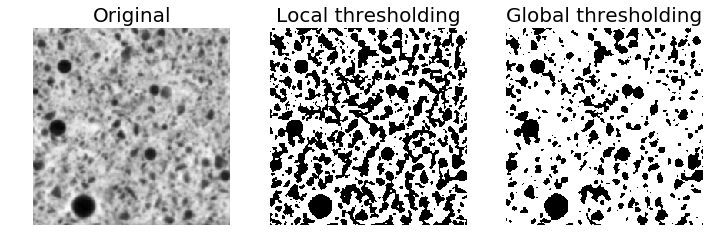

In [3]:
k = 230
ori_image = (data[k,:,:,0])

global_thresh = threshold_otsu(ori_image)
binary_global = ori_image > global_thresh

block_size = 49
local_thresh = threshold_local(ori_image, block_size)
binary_local = ori_image > local_thresh


fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
plt.gray()

ax[0].imshow(ori_image)
ax[0].set_title('Original', fontsize=20)
ax[1].imshow(binary_local)
ax[1].set_title('Local thresholding', fontsize=20)
ax[2].imshow(binary_global)
ax[2].set_title('Global thresholding', fontsize=20)


for a in ax:
    a.axis('off')
plt.show()


In [4]:
binary_global = ~binary_global #reverse greyscale

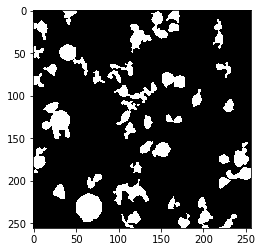

In [5]:
#remove isolated pixels
binary_clean = remove_small_objects(binary_global, min_size=100, connectivity=1, in_place=False)
plt.imshow(binary_clean)
img_open = opening(binary_clean, disk(7))

# Method 1: Openning

Text(0.5, 1.0, 'opening')

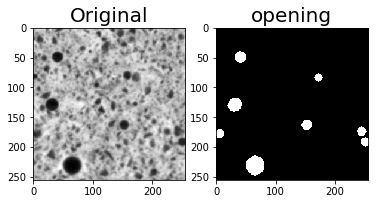

In [6]:
fig, axes = plt.subplots(ncols = 2, nrows=1, figsize=(6, 12))
ax = axes.ravel()
plt.gray()

ax[0].imshow(ori_image)
ax[0].set_title('Original', fontsize=20)
ax[1].imshow(img_open)
ax[1].set_title('opening', fontsize=20)

# Method 2: Blob detection

In [7]:
edge_horizont = ndimage.sobel(binary_clean, 0)
edge_vertical = ndimage.sobel(binary_clean, 1)

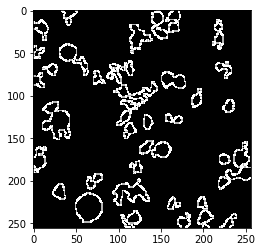

In [8]:
magnitude = np.hypot(1*edge_horizont, 1*edge_vertical)
plt.imshow(magnitude)

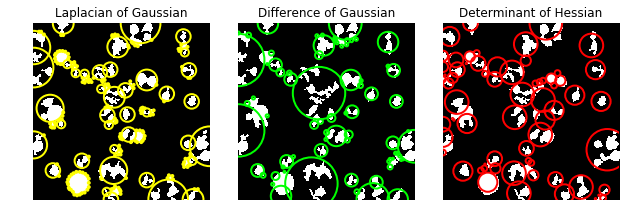

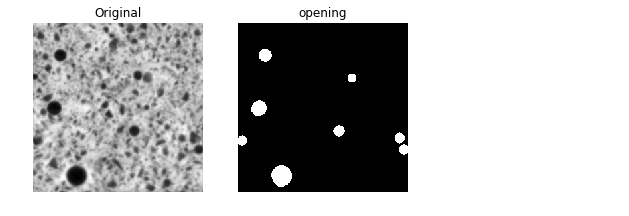

In [9]:
image = binary_clean
image_gray = binary_clean

blobs_log = blob_log(magnitude, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(magnitude, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(magnitude, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()


fig, axes = plt.subplots(ncols = 3, nrows=1, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()
plt.gray()

ax[0].imshow(ori_image)
ax[0].set_title('Original')
ax[0].set_axis_off()
ax[1].imshow(img_open)
ax[1].set_title('opening')
ax[1].set_axis_off()
ax[2].set_axis_off()
plt.tight_layout()
